In [2]:
from transformers import LayoutLMv2ForTokenClassification, LayoutLMv2Processor
from PIL import Image

# Load pre-trained model and processor
model = LayoutLMv2ForTokenClassification.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased")


/Users/boyander/KIRBIC/content-talleres-jornadas/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of LayoutLMv2ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv2-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


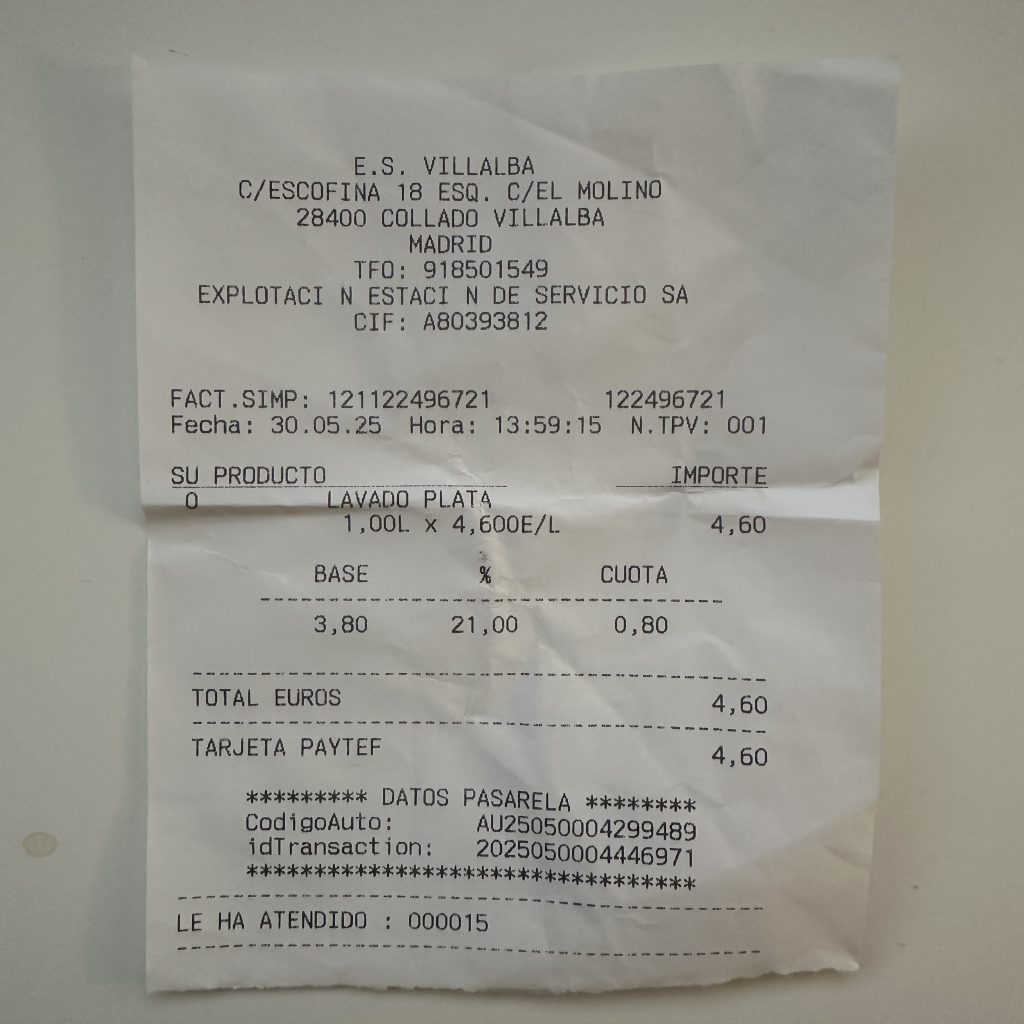

In [3]:
# Load image
image = Image.open("../../data/ticket.jpg").resize((1024,1024),Image.BOX)
image


In [4]:
encoding = processor(image, return_tensors="pt")
encoding

{'input_ids': tensor([[  101,  1041,  1012,  1055,  1012,  6992, 20850,  2050,  1039,  1013,
          9686,  3597, 16294,  2050,  2324, 25325,  1012,  1039,  1013,  3449,
          9587, 25226, 26871,  8889,  8902, 27266,  2080,  6992, 20850,  2050,
          6921,  1056, 14876,  1024,  6205, 27531, 24096, 27009,  2683,  4654,
         24759, 17287,  6895,  1050,  9765,  6305,  2072,  1050,  2139, 14262,
          7903,  3695,  7842, 25022,  2546,  1024,  1037, 17914, 23499, 22025,
         12521,  2755,  1012, 21934,  2361,  1024, 12606, 12521, 18827,  2683,
          2575,  2581, 17465, 13092, 26224,  2575,  2581, 17465, 10768,  7507,
          1024,  2382,  1012,  5709,  1012,  2423,  7570,  2527,  1024,  2410,
          1024,  5354,  1024,  2321,  1050,  1012,  1056,  2361,  2615,  1024,
         25604, 19181,  2080, 29347,  1035,  1035,  1046,  8737,  2953,  4168,
          1024, 25212,  2293,  4168,  7382,  7382,  2078,  3567,  3527,  1010,
         19534,  1015,  1010,  4002,  

In [5]:
encoding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'bbox', 'image'])

In [6]:
encoding["input_ids"]

tensor([[  101,  1041,  1012,  1055,  1012,  6992, 20850,  2050,  1039,  1013,
          9686,  3597, 16294,  2050,  2324, 25325,  1012,  1039,  1013,  3449,
          9587, 25226, 26871,  8889,  8902, 27266,  2080,  6992, 20850,  2050,
          6921,  1056, 14876,  1024,  6205, 27531, 24096, 27009,  2683,  4654,
         24759, 17287,  6895,  1050,  9765,  6305,  2072,  1050,  2139, 14262,
          7903,  3695,  7842, 25022,  2546,  1024,  1037, 17914, 23499, 22025,
         12521,  2755,  1012, 21934,  2361,  1024, 12606, 12521, 18827,  2683,
          2575,  2581, 17465, 13092, 26224,  2575,  2581, 17465, 10768,  7507,
          1024,  2382,  1012,  5709,  1012,  2423,  7570,  2527,  1024,  2410,
          1024,  5354,  1024,  2321,  1050,  1012,  1056,  2361,  2615,  1024,
         25604, 19181,  2080, 29347,  1035,  1035,  1046,  8737,  2953,  4168,
          1024, 25212,  2293,  4168,  7382,  7382,  2078,  3567,  3527,  1010,
         19534,  1015,  1010,  4002,  1060,  1018,  

In [7]:
encoding["bbox"].shape

torch.Size([1, 222, 4])

In [8]:
encoding["bbox"].numpy().squeeze()

array([[   0,    0,    0,    0],
       [ 346,  153,  394,  170],
       [ 346,  153,  394,  170],
       [ 346,  153,  394,  170],
       [ 346,  153,  394,  170],
       [ 414,  152,  521,  170],
       [ 414,  152,  521,  170],
       [ 414,  152,  521,  170],
       [ 233,  175,  371,  196],
       [ 233,  175,  371,  196],
       [ 233,  175,  371,  196],
       [ 233,  175,  371,  196],
       [ 233,  175,  371,  196],
       [ 233,  175,  371,  196],
       [ 389,  178,  412,  196],
       [ 428,  177,  476,  197],
       [ 428,  177,  476,  197],
       [ 496,  176,  548,  198],
       [ 496,  176,  548,  198],
       [ 496,  176,  548,  198],
       [ 564,  175,  645,  195],
       [ 564,  175,  645,  195],
       [ 290,  203,  357,  221],
       [ 290,  203,  357,  221],
       [ 373,  204,  466,  222],
       [ 373,  204,  466,  222],
       [ 373,  204,  466,  222],
       [ 482,  203,  589,  221],
       [ 482,  203,  589,  221],
       [ 482,  203,  589,  221],
       [ 4

In [9]:
import numpy as np
np.squeeze(encoding["image"]).numpy()

array([[[126, 127, 127, ..., 125, 126, 126],
        [126, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 128, 126],
        ...,
        [124, 124, 123, ..., 126, 125, 125],
        [124, 124, 123, ..., 124, 124, 124],
        [122, 122, 122, ..., 124, 125, 124]],

       [[137, 137, 137, ..., 138, 139, 139],
        [137, 137, 138, ..., 140, 140, 140],
        [138, 138, 138, ..., 140, 141, 139],
        ...,
        [132, 132, 131, ..., 140, 139, 139],
        [132, 132, 131, ..., 138, 138, 138],
        [130, 130, 130, ..., 137, 138, 137]],

       [[135, 135, 135, ..., 140, 141, 141],
        [135, 135, 136, ..., 142, 142, 142],
        [136, 136, 136, ..., 142, 143, 141],
        ...,
        [131, 131, 130, ..., 146, 145, 145],
        [131, 131, 130, ..., 144, 144, 144],
        [129, 129, 129, ..., 143, 144, 143]]],
      shape=(3, 224, 224), dtype=uint8)

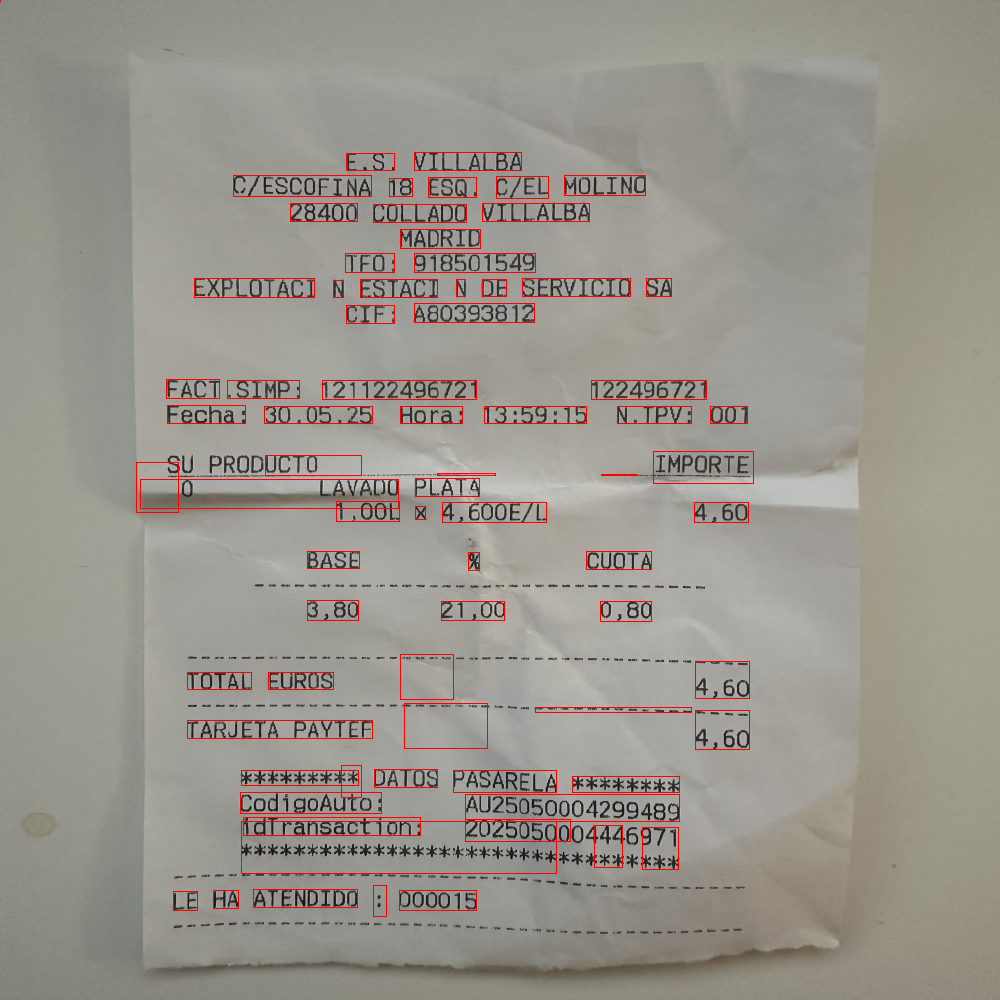

In [10]:
from PIL import Image, ImageDraw, ImageFont
actual_boxes = []
for idx, row in enumerate(encoding["bbox"].numpy().squeeze()):
  x0, y0, x1, y1 = tuple(row) # the row comes in (left, top, width, height) format
  actual_box = [x0,y0,x1,y1] # we turn it into (left, top, left+width, top+height) to get the actual box 
  actual_boxes.append(actual_box)

dr_image = image.copy().resize((1000,1000),Image.BOX)
draw = ImageDraw.Draw(dr_image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')
  
display(dr_image)

In [119]:
# Perform inference
outputs = model(**encoding)
predictions = outputs.logits.argmax(-1).squeeze().tolist()

# Post-process predictions
labels = ["Invoice", "Contract", "Legal Document"]
result = labels[predictions[0]]
print(result)

Invoice
